In [13]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

## 1. Implementación y visualización de k-means en 2D:

 ### a. Cargue la base de datos kmeans1.csv utilizando pandas

In [5]:
df = pd.read_csv("/content/kmeans1.csv")
df.head()

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


In [14]:
df.count()

,0
A,400
B,400


### b. Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter plot) de las variables A y B. ¿Cuántos clusters visualiza?

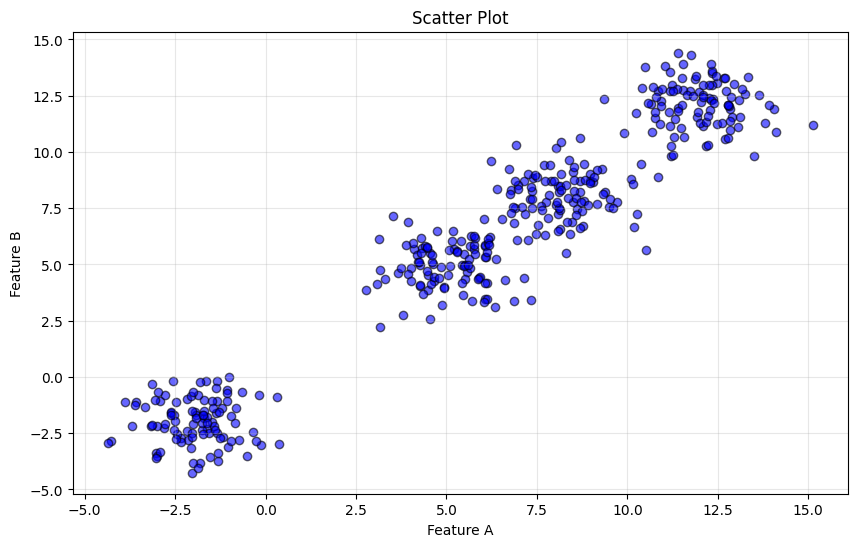

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['A'],df['B'],alpha=0.6, c='blue', edgecolors='black')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()

Se visualizan 4 clusters

### c. Aplique el algoritmo k-means disponible en Scikit-Learn y observe los outputs disponibles (centroides, clusters asignados y distancia dentro de las clases).

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [44]:
k = 4

kmeans = KMeans(
    n_clusters=k,
    n_init=10,
)

kmeans.fit(df[['A', 'B']])

KMeans(n_clusters=4, n_init=10)

In [45]:
print(f"LABELS")
cluster_labels = kmeans.labels_
print(f"Grupos formados: {np.unique(kmeans.labels_)}")
print(f"Cantidad en cluster 0: {np.sum(cluster_labels == 0)}")
print(f"Cantidad en cluster 1: {np.sum(cluster_labels == 1)}")
print(f"Cantidad en cluster 2: {np.sum(cluster_labels == 2)}")
print(f"Cantidad en cluster 3: {np.sum(cluster_labels == 3)}")

LABELS
Grupos formados: [0 1 2 3]
Cantidad en cluster 0: 100
Cantidad en cluster 1: 100
Cantidad en cluster 2: 99
Cantidad en cluster 3: 101


Se observa que los grupos tienen una poblacion parecida

In [46]:
print(f"CENTROIDES")
centroids = kmeans.cluster_centers_
print("Los 4 centroides son:")
for i, centroid in enumerate(centroids):
    print(f"  Cluster {i}: A = {centroid[0]:.2f}, B = {centroid[1]:.2f}")
print()

CENTROIDES
Los 4 centroides son:
  Cluster 0: A = 5.07, B = 4.95
  Cluster 1: A = -1.92, B = -1.97
  Cluster 2: A = 11.98, B = 12.13
  Cluster 3: A = 8.21, B = 8.09



In [35]:
kmeans.n_iter_

2

In [47]:
print(f"Inertia (suma de distancias al cuadrado): {kmeans.inertia_:.2f}")

distancias_individuales = []
for i in range(len(df)):
    punto = df[['A', 'B']].iloc[i].values
    cluster = cluster_labels[i]
    centroide = centroids[cluster]
    distancia = np.sqrt(np.sum((punto - centroide)**2))
    distancias_individuales.append(distancia)

distancias_individuales = np.array(distancias_individuales)

print(f"\nDistancia promedio:  {np.mean(distancias_individuales):.2f}")

Inertia (suma de distancias al cuadrado): 789.00

Distancia promedio:  1.26


En la inertia se usa la distancia del punto a su centroide asignado y se eleva al cuadrado para penalizar mejor los puntos mas alejados. luego se suman todas estas distancias

### d. Ajuste k-means considerando 1, 2, ..., 10 clusters, guarde la distancia  intraclases en un diccionario.

In [48]:
inertias = {}

# Rango de k a probar
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
    )
    kmeans.fit(df[['A', 'B']])

    inertias[k] = kmeans.inertia_

    print(f"k = {k:2d}  →  Inertia = {kmeans.inertia_:8.2f}")

k =  1  →  Inertia = 21781.79
k =  2  →  Inertia =  5728.23
k =  3  →  Inertia =  1733.80
k =  4  →  Inertia =   789.00
k =  5  →  Inertia =   715.20
k =  6  →  Inertia =   642.39
k =  7  →  Inertia =   574.88
k =  8  →  Inertia =   510.31
k =  9  →  Inertia =   459.87
k = 10  →  Inertia =   417.51


In [49]:
inertias

{1: 21781.79297599223,
 2: 5728.229140045013,
 3: 1733.8031989481474,
 4: 789.0012783558573,
 5: 715.1990495229476,
 6: 642.3860762156077,
 7: 574.8808367342745,
 8: 510.3057834340522,
 9: 459.8749903168049,
 10: 417.50720793095303}

### e. Utilizando matplotlib (o seaborn) genere un gráfico que presente la distancia intraclases. Utilizando el criterio del codo defina el número de clusters.

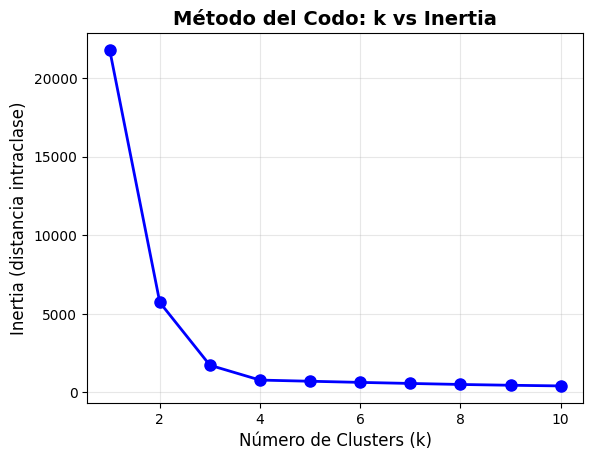

In [54]:
plt.plot(list(inertias.keys()), list(inertias.values()),
         marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Numero de Clusters (k)', fontsize=12)
plt.ylabel('Inertia (distancia intraclase)', fontsize=12)
plt.title('Método del Codo: k vs Inertia', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

A partir de k=4 la inertia disminuye muy poco es casi imperceptible

## 2. Análisis de clusters

### a. Cargue la base de datos k-means2.csv y genere un análisis descriptivo de la base de datos

In [3]:
df = pd.read_csv("/content/kmeans2.csv")
df.head()

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   int64  
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 547.0 KB


In [6]:
# Nulos
df.isnull().sum()

,0
Unnamed: 0,0
Amplitude,0
AndersonDarling,0
Autocor_length,0
Beyond1Std,0
Gskew,0
LinearTrend,0
MaxSlope,0
Mean,0
Meanvariance,0


In [7]:
print("ESTADÍSTICAS DESCRIPTIVAS")
df.describe()

ESTADÍSTICAS DESCRIPTIVAS


,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,1443.520003,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.000000,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,1249.750000,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,2499.500000,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,3749.250000,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,4999.000000,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


### b. Visualice y preprocese las variables disponibles dentro de ella.

In [8]:
## Retiramos la columa indice
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [11]:
len(df.columns)

13

In [9]:
print(df.columns.tolist())
print(f"Número de features: {df.shape[1]}")
print(f"Número de muestras: {df.shape[0]}")

['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'Gskew', 'LinearTrend', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PercentAmplitude', 'PeriodLS']
Número de features: 13
Número de muestras: 5000


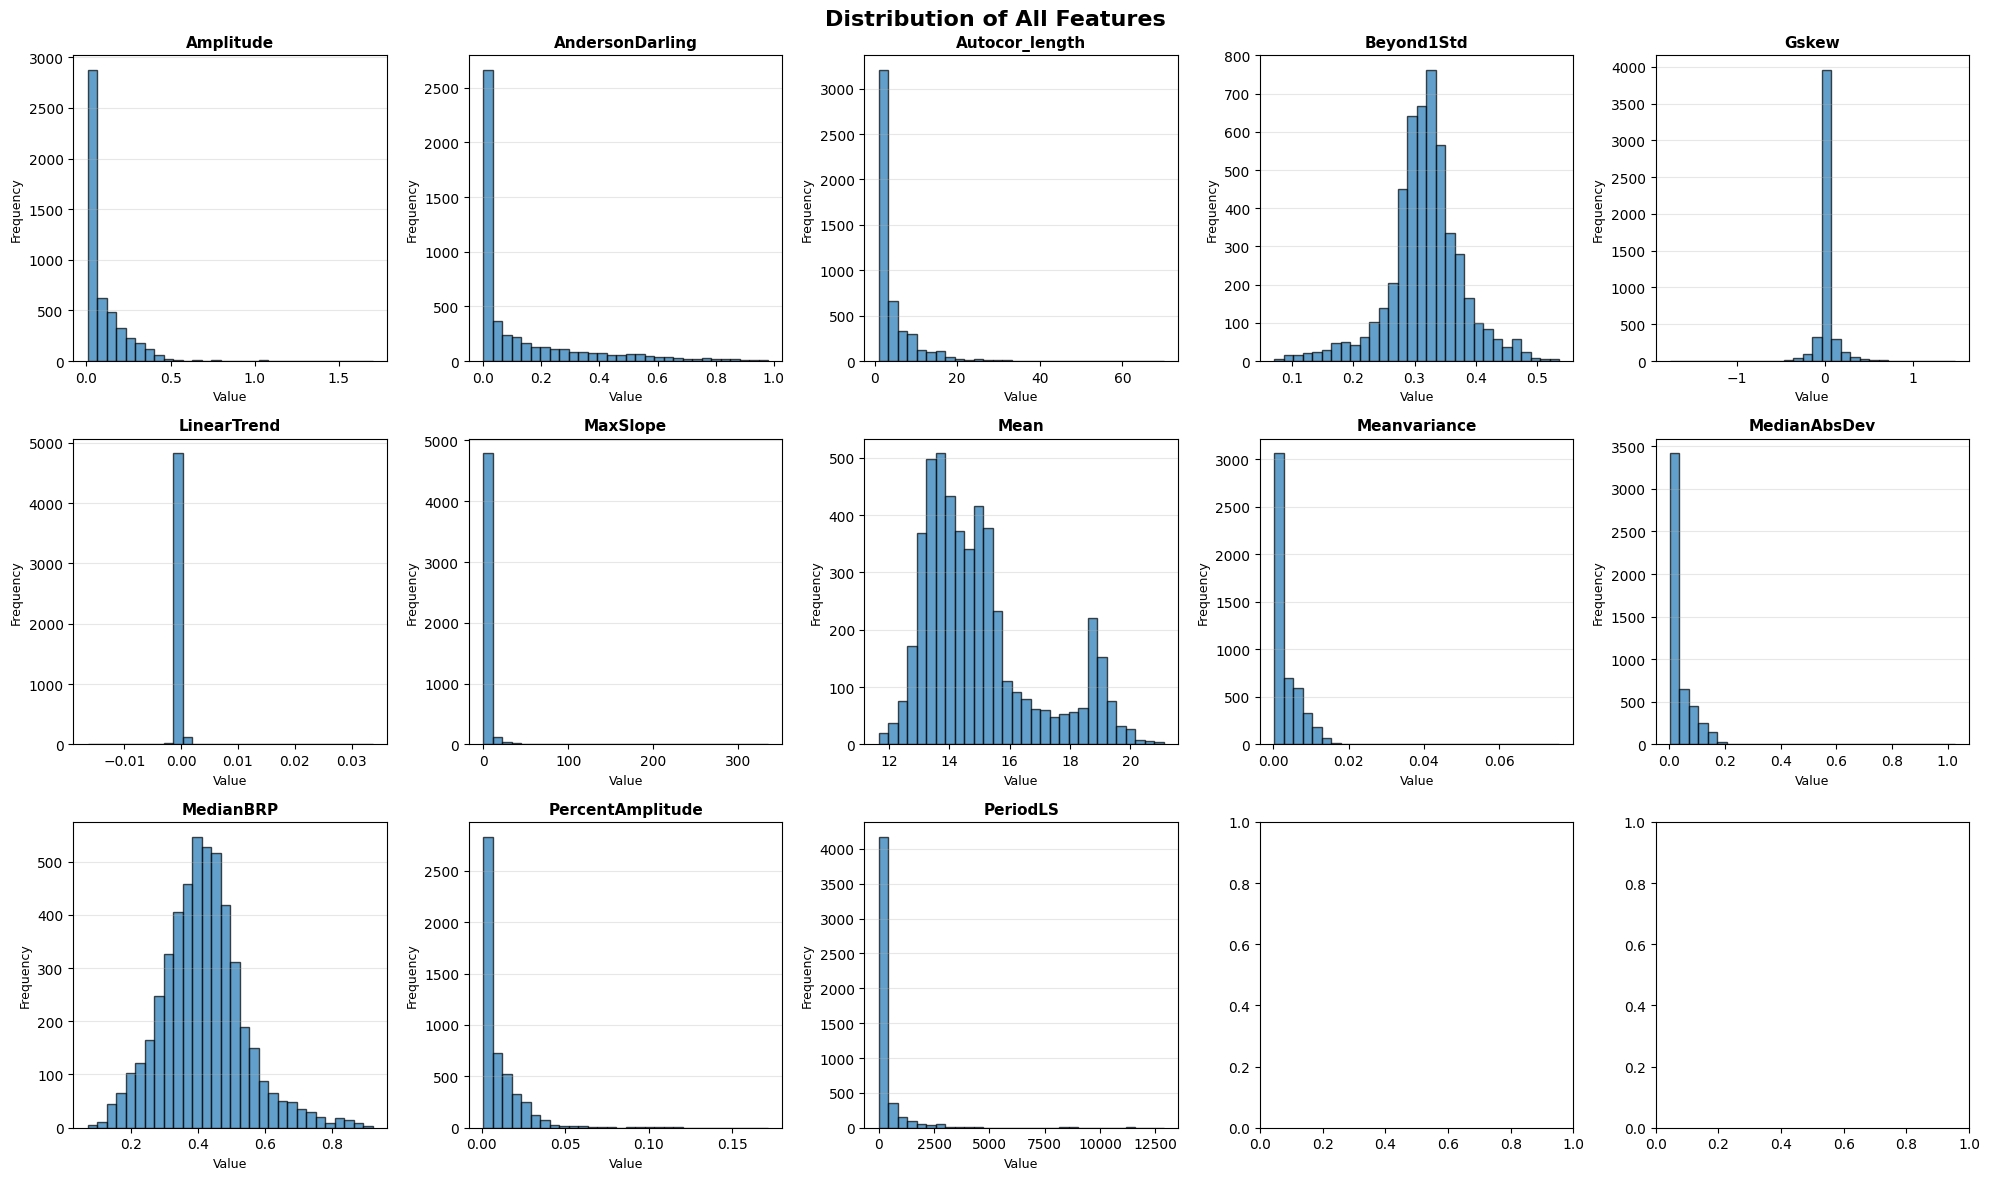

In [15]:
n_cols = 5
n_rows = int(np.ceil(len(df.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### c. Aplique el algoritmo k-means a la base de datos. Determine el número de clusters adecuados con el criterio visto en la actividad anterior

In [16]:
inertias = {}
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
    )
    kmeans.fit(df)
    inertias[k] = kmeans.inertia_
    print(f"k = {k:2d}  →  Inertia = {kmeans.inertia_:8.2f}")

k =  1  →  Inertia = 4461723860.50
k =  2  →  Inertia = 1638073931.06
k =  3  →  Inertia = 522990038.14
k =  4  →  Inertia = 293856666.86
k =  5  →  Inertia = 190453394.13
k =  6  →  Inertia = 135914458.06
k =  7  →  Inertia = 87495507.95
k =  8  →  Inertia = 63755164.15
k =  9  →  Inertia = 48228564.90
k = 10  →  Inertia = 38501562.81


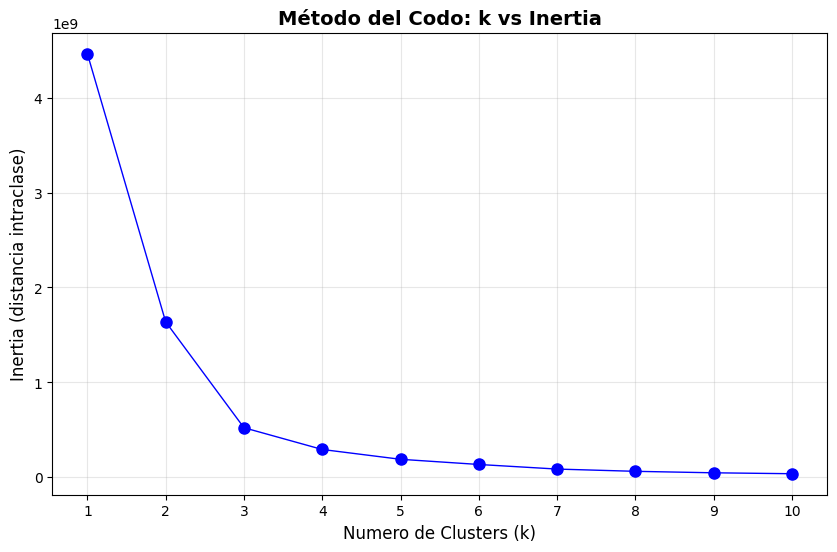

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(list(inertias.keys()), list(inertias.values()),
         marker='o', linewidth=1, markersize=8, color='blue')
plt.xlabel('Numero de Clusters (k)', fontsize=12)
plt.ylabel('Inertia (distancia intraclase)', fontsize=12)
plt.title('Método del Codo: k vs Inertia', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

Numero de clusters adecuados 6 de acuerdo al metodo del codo

In [24]:
k = 6

kmeans = KMeans(
    n_clusters=k,
    n_init=10,
)

kmeans.fit(df)

KMeans(n_clusters=6, n_init=10)

### d. Interprete los resultados de los centroides.

In [29]:
centroids = kmeans.cluster_centers_
print("Los centroides son:")
for i, centroid in enumerate(centroids):
    print(f"  Cluster {i}: {centroid}")
print()

Los centroides son:
  Cluster 0: [1.09931540e-01 1.32504397e-01 3.74563155e+00 3.17251491e-01
 1.88794309e-02 7.83599601e-06 2.56007853e+00 1.52000151e+01
 3.71411682e-03 4.02026960e-02 4.14274794e-01 1.07908390e-02
 3.61421598e+01]
  Cluster 1: [ 3.81406250e-02  1.17003219e-01  3.90625000e+00  3.05624938e-01
  3.18750000e-03 -2.01875000e-05  4.16220312e-01  1.43861631e+01
  1.34956250e-03  1.24531250e-02  4.66875000e-01  4.25709375e-03
  9.47386400e+03]
  Cluster 2: [ 6.38626126e-02  1.25179464e-01  7.31981982e+00  3.10901005e-01
  1.32995495e-02 -1.93153153e-05  6.98883252e-01  1.42180691e+01
  2.28565315e-03  2.06103604e-02  4.38500338e-01  6.79862613e-03
  1.40618580e+03]
  Cluster 3: [ 6.62116935e-02  1.63432863e-01  9.20967742e+00  3.16265323e-01
 -2.82258065e-03 -7.03064516e-05  6.79410669e-01  1.43207713e+01
  2.31247581e-03  2.24516129e-02  4.25151306e-01  6.55486290e-03
  2.50540983e+03]
  Cluster 4: [ 4.55800000e-02  1.89725040e-01  7.16000000e+00  3.16317960e-01
  4.9200000

Se observa que en algunas dimensiones los valores son muy altos comparados con otras dimensiones por ejemplo en el centroide del cluster 0 : 1.52000151e+01 y  3.61421598e+01 comparados con 7.83599601e-06

En el cluster 1 tambien se observa un dato resaltante en su centroide que se aleja de los demas puntos  9.47386400e+03 es un valor muy alto

In [34]:
cluster_labels = kmeans.labels_
print(f"Grupos formados: {np.unique(kmeans.labels_)}")

for i, c_label in enumerate(np.unique(kmeans.labels_)):
  print(f"Cantidad en cluster {c_label}: {np.sum(cluster_labels == c_label)}")

Grupos formados: [0 1 2 3 4 5]
Cantidad en cluster 0: 4006
Cantidad en cluster 1: 32
Cantidad en cluster 2: 222
Cantidad en cluster 3: 124
Cantidad en cluster 4: 25
Cantidad en cluster 5: 591


Tambien se observa que no hay una distribucion pareja entre los clusters, unos tienen mucha poblacion y otros muy poca.

### e. Aplique el clustering jerárquico. Visualice el dendograma y determine el número de clusters.

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [40]:
df=((df-df.min())/(df.max()-df.min()))

#Se define función para graficar el dendograma (obtenida de Sklearn)
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [41]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clustering = clustering.fit(df)

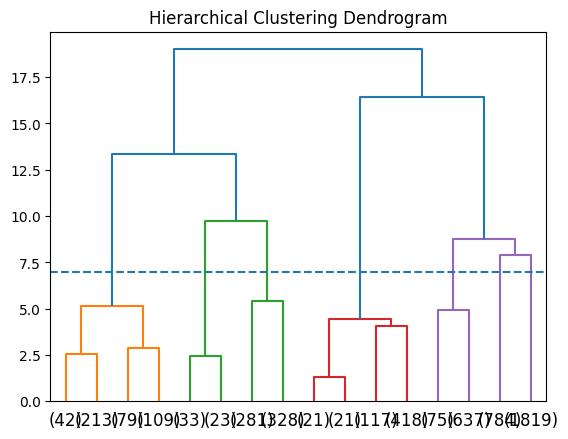

In [51]:
plt.title('Hierarchical Clustering Dendrogram')

plot_dendrogram(clustering, truncate_mode='level', p=3)

plt.axhline(linestyle='--', y=7)

plt.show()

Se visualizan 7 clusters

### f. Estudie el modelo de mezcla de Gaussianas desde las lecturas obligatorias de este módulo y use su implementación en Scikit-Learn.

In [82]:
from sklearn.mixture import GaussianMixture

In [83]:
df_gmm = df.copy()
columns_to_remove = ['GMM_Cluster', 'Cluster_Hierarchical']
for col in columns_to_remove:
    if col in df_gmm.columns:
        df_gmm = df_gmm.drop(col, axis=1)

In [84]:
df_gmm

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.011810,0.000000,0.028986,0.427995,0.549661,0.327761,0.000370,0.276117,0.009723,0.006843,0.544094,0.023519,0.001389
1,0.122232,0.000000,0.246377,0.592447,0.582665,0.327920,0.000012,0.215173,0.110845,0.093353,0.200045,0.152480,0.000077
2,0.155595,0.000000,0.000000,0.327894,0.615361,0.327701,0.000934,0.816455,0.085561,0.067449,0.540185,0.155785,0.000196
3,0.198110,0.000000,0.173913,0.699698,0.538556,0.326105,0.001963,0.270386,0.171995,0.146139,0.211774,0.168550,0.009102
4,0.002214,0.099096,0.000000,0.522011,0.543183,0.327860,0.000296,0.206016,0.001995,0.001955,0.498759,0.003382,0.000594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.019486,0.115030,0.014493,0.578146,0.545034,0.327621,0.005021,0.177003,0.017886,0.013196,0.411166,0.022453,0.001378
4996,0.121346,0.000000,0.710145,0.842697,0.523597,0.323431,0.034564,0.259442,0.119207,0.120235,0.274328,0.100964,0.106848
4997,0.008710,0.030876,0.043478,0.563845,0.546885,0.327282,0.000023,0.298014,0.007398,0.006843,0.264833,0.007314,0.086363
4998,0.011515,0.455902,0.014493,0.520945,0.544725,0.328160,0.000401,0.211514,0.009419,0.006843,0.422895,0.013644,0.222698


In [85]:
n_componentes = np.arange(1,11)

n_components_range = range(1, 11)
bic_scores = []
aic_scores = []
models = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, n_init=10)
    models.append(gmm)
    gmm.fit(df_gmm)
    bic_scores.append(gmm.bic(df_gmm))
    aic_scores.append(gmm.aic(df_gmm))

Text(0.5, 0, 'n_componentes')

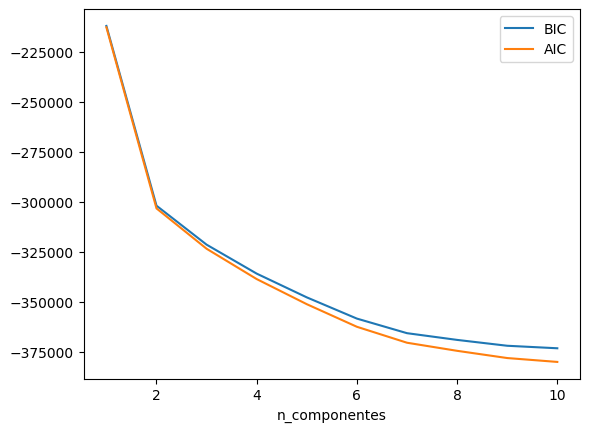

In [87]:
plt.plot(n_componentes, [ m.bic(df_gmm) for m in models], label = 'BIC')

plt.plot(n_componentes, [ m.aic(df_gmm) for m in models], label = 'AIC')

plt.legend(loc='best')
plt.xlabel('n_componentes')

In [89]:
bic_scores

[np.float64(-211896.63875123276),
 np.float64(-301912.57656232035),
 np.float64(-321423.64804878255),
 np.float64(-335927.0082392321),
 np.float64(-347819.73253401706),
 np.float64(-358446.7597131245),
 np.float64(-365747.9863747872),
 np.float64(-369113.4723733799),
 np.float64(-372047.033032865),
 np.float64(-373304.2911161015)]

In [90]:
aic_scores

[np.float64(-212574.42684314004),
 np.float64(-303274.66993932636),
 np.float64(-323470.0467108872),
 np.float64(-338657.7121864355),
 np.float64(-351234.7417663192),
 np.float64(-362546.0742305253),
 np.float64(-370531.6061772867),
 np.float64(-374581.3974609781),
 np.float64(-378199.2634055619),
 np.float64(-380140.8267738971)]

De acuerdo al los scores podemos observar que a partir del 7 hay variaciones muy pegadas por ejemplo en BIC SCORES del 6 al 7 se observan

 6 -> np.float64(-**358**446.7597131245),
 7 -> np.float64(-**365**747.9863747872),
 8-> np.float64(-**369**113.4723733799),

- **Del 6 al 7 hay un cambio de 358 a 365 pero luego del 7 al 8 solamente 365 a 369**

De igual forma se observa en AIC Scores

 6 -> np.float64(-**3625**46.0742305253),
 7 -> np.float64(-**370**531.6061772867),
 8 -> np.float64(-**374**581.3974609781),

In [91]:
df_gmm

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.011810,0.000000,0.028986,0.427995,0.549661,0.327761,0.000370,0.276117,0.009723,0.006843,0.544094,0.023519,0.001389
1,0.122232,0.000000,0.246377,0.592447,0.582665,0.327920,0.000012,0.215173,0.110845,0.093353,0.200045,0.152480,0.000077
2,0.155595,0.000000,0.000000,0.327894,0.615361,0.327701,0.000934,0.816455,0.085561,0.067449,0.540185,0.155785,0.000196
3,0.198110,0.000000,0.173913,0.699698,0.538556,0.326105,0.001963,0.270386,0.171995,0.146139,0.211774,0.168550,0.009102
4,0.002214,0.099096,0.000000,0.522011,0.543183,0.327860,0.000296,0.206016,0.001995,0.001955,0.498759,0.003382,0.000594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.019486,0.115030,0.014493,0.578146,0.545034,0.327621,0.005021,0.177003,0.017886,0.013196,0.411166,0.022453,0.001378
4996,0.121346,0.000000,0.710145,0.842697,0.523597,0.323431,0.034564,0.259442,0.119207,0.120235,0.274328,0.100964,0.106848
4997,0.008710,0.030876,0.043478,0.563845,0.546885,0.327282,0.000023,0.298014,0.007398,0.006843,0.264833,0.007314,0.086363
4998,0.011515,0.455902,0.014493,0.520945,0.544725,0.328160,0.000401,0.211514,0.009419,0.006843,0.422895,0.013644,0.222698


In [94]:
optimal_components = 7

gmm_final = GaussianMixture(
    n_components=optimal_components,
    n_init=10,
    covariance_type='full'  # 'full', 'tied', 'diag', 'spherical'
)
gmm_final.fit(df_gmm)


clusters = gmm_final.predict(df_gmm)
probabilities = gmm_final.predict_proba(df_gmm)

df_gmm['GMM_Cluster'] = clusters
df_gmm['GMM_Probability'] = probabilities.max(axis=1)

print(f"\nTamaño de clusters GMM:")
print(df_gmm['GMM_Cluster'].value_counts().sort_index())



Tamaño de clusters GMM:
GMM_Cluster
0     685
1     425
2    1646
3    1177
4     705
5     195
6     167
Name: count, dtype: int64


### g. Utilizando visualizaciones y métricas de evaluación adecuadas, compare los resultados de K-means y GMM. Comente las principales ventajas de GMM respecto de K- means

In [97]:
df_clean = df.copy()
columns_to_remove = ['GMM_Cluster', 'Cluster_Hierarchical']
for col in columns_to_remove:
    if col in df_clean.columns:
        df_clean = df_clean.drop(col, axis=1)

df_clean

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.011810,0.000000,0.028986,0.427995,0.549661,0.327761,0.000370,0.276117,0.009723,0.006843,0.544094,0.023519,0.001389
1,0.122232,0.000000,0.246377,0.592447,0.582665,0.327920,0.000012,0.215173,0.110845,0.093353,0.200045,0.152480,0.000077
2,0.155595,0.000000,0.000000,0.327894,0.615361,0.327701,0.000934,0.816455,0.085561,0.067449,0.540185,0.155785,0.000196
3,0.198110,0.000000,0.173913,0.699698,0.538556,0.326105,0.001963,0.270386,0.171995,0.146139,0.211774,0.168550,0.009102
4,0.002214,0.099096,0.000000,0.522011,0.543183,0.327860,0.000296,0.206016,0.001995,0.001955,0.498759,0.003382,0.000594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.019486,0.115030,0.014493,0.578146,0.545034,0.327621,0.005021,0.177003,0.017886,0.013196,0.411166,0.022453,0.001378
4996,0.121346,0.000000,0.710145,0.842697,0.523597,0.323431,0.034564,0.259442,0.119207,0.120235,0.274328,0.100964,0.106848
4997,0.008710,0.030876,0.043478,0.563845,0.546885,0.327282,0.000023,0.298014,0.007398,0.006843,0.264833,0.007314,0.086363
4998,0.011515,0.455902,0.014493,0.520945,0.544725,0.328160,0.000401,0.211514,0.009419,0.006843,0.422895,0.013644,0.222698


In [99]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [114]:
# Inicialmente habiamos usado 6 clusters para kmeans asi que volveremos a entrenar con 7 clusters para hacer una comparacion mas justa entre estos dos metodos
k = 7

kmeans = KMeans(
    n_clusters=k,
    n_init=10,
)

In [115]:
# K-means
kmeans_labels = kmeans.fit_predict(df_clean)

# GMM
gmm = GaussianMixture(n_components=k,n_init=10,covariance_type='full')
gmm.fit(df_clean)
gmm_labels = gmm.predict(df_clean)
gmm_probs = gmm.predict_proba(df_clean)
gmm_max_probs = gmm_probs.max(axis=1)

In [116]:
print("\nMétricas de evaluación...")

# Silhouette Score (higher is better, range: -1 to 1)
sil_kmeans = silhouette_score(df_clean, kmeans.labels_)
sil_gmm = silhouette_score(df_clean, gmm_labels)

# Davies-Bouldin Index (lower is better)
db_kmeans = davies_bouldin_score(df_clean, kmeans_labels)
db_gmm = davies_bouldin_score(df_clean, gmm_labels)

# Calinski-Harabasz Score (higher is better)
ch_kmeans = calinski_harabasz_score(df_clean, kmeans_labels)
ch_gmm = calinski_harabasz_score(df_clean, gmm_labels)

metrics_df = pd.DataFrame({
    'Métrica': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'],
    'K-means': [sil_kmeans, db_kmeans, ch_kmeans],
    'GMM': [sil_gmm, db_gmm, ch_gmm]
})
print(metrics_df.to_string(index=False))


Métricas de evaluación...
                Métrica     K-means        GMM
       Silhouette Score    0.265263   0.008459
   Davies-Bouldin Index    1.114411   3.501380
Calinski-Harabasz Score 1711.058864 391.413552


/tmp/ipython-input-1826831539.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipython-input-1826831539.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


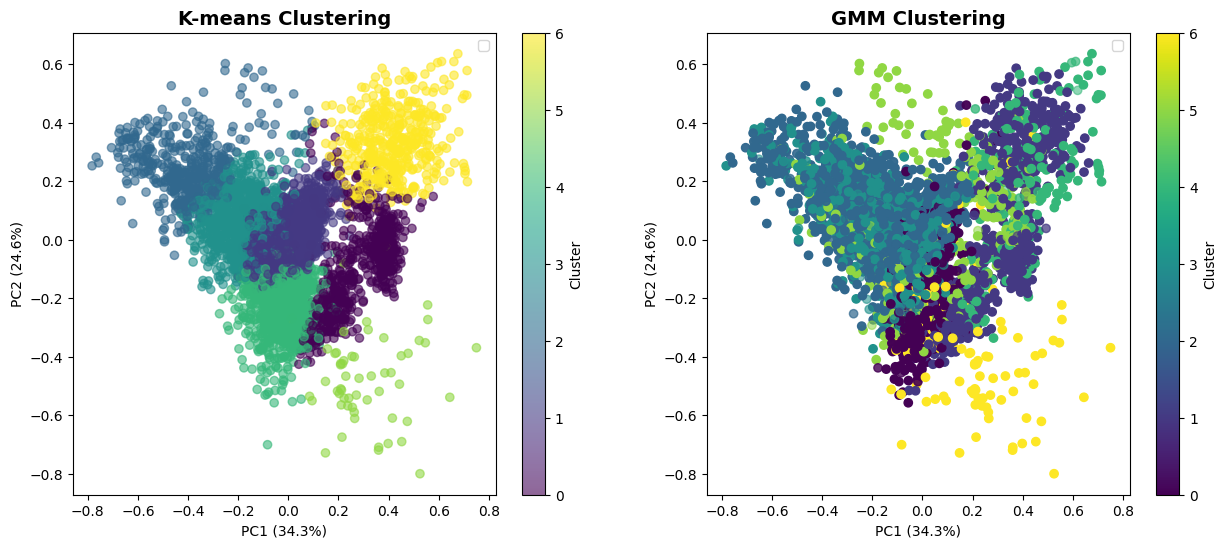

In [125]:
# Reduce dimensionalidad for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df_clean)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means
scatter1 = ax1.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6 )
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_title('K-means Clustering', fontweight='bold', fontsize=14)
ax1.legend()
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# GMM
scatter2 = ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=gmm_labels, cmap='viridis',
                       alpha=gmm_max_probs)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_title('GMM Clustering', fontweight='bold', fontsize=14)
ax2.legend()
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.show()

Las ventajas del GMM es que es mucho mas flexible y no solo genera grupos  equilibrados o con forma circular, ademas aqui se pueden detectar casos de outliers y lo que nos indica finalmente es una probabilidad de que un elemento pertenezca o no a un grupo, sim embargo KMeans es un poco mas decisivo al determinar si pertenece o no, al contrario GMM nos da probabilidad lo que es un poco mas honesto y ya queda a nuestra interpretacion.

Despues de haber calulado las métricas con el número de clusters 7 que fue el mas óptimo de acuerdo al método del codo y al metodo del BIC Scores y AIC Scores, considero que Kmeans ha agrupado mejor los clusters y eso tambien se refleja en las metricas y el gráfico. Tal vez se debio primero normalizar los datos del daaset para que pueda haber una mejor performance de parte de GMM. Para futuros casos recomendaria implementar una normalizacion ya que los datos estuvieron muy variados como observamos en el punto D. de este ejercicio.

Se ha usado de referencia el codigo de la Ayudantia 4